In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import numpy as np, pandas as pd, os, re, matplotlib.pyplot as plt, torch, sys, pickle
sys.path.append("../tools/")
sys.path.append("../models/")
from NNInterface import NNInterface
from main import KinaseSubstrateRelationshipNN
from tensorize import gather_data

In [26]:
config = {
    "learning_rate": 0.003,
    "batch_size": 64,
    "ll1_size": 50,
    "ll2_size": 25,
    "emb_dim": 22,
    "num_epochs": 1,
    "n_gram": 1,
    "lr_decay_amt": 0.35,
    "lr_decay_freq": 3,
    "num_conv_layers": 1,
    "dropout_pr": 0.4,
    "site_param_dict": {"kernels": [8], "out_lengths": [8], "out_channels": [20]},
    "kin_param_dict": {"kernels": [100], "out_lengths": [8], "out_channels": [20]},
}

model = KinaseSubstrateRelationshipNN(num_classes=1, inp_size=[[64, 15], [64, 4128]], ll1_size=config['ll1_size'], ll2_size=config['ll2_size'], emb_dim=config['emb_dim'], num_conv_layers=config['num_conv_layers'], site_param_dict=config['site_param_dict'], kin_param_dict=config['kin_param_dict'], dropout_pr=config['dropout_pr']).to('cuda:4')

In [17]:
nn = NNInterface(model, torch.nn.BCEWithLogitsLoss(), None, None, None, None, 'cuda:4')
nn.load_model("../bin/saved_state_dicts/2022-12-05T21:54:11.581024.pkl")

In [19]:
tokdict = {"M": 0,"E": 1,"D": 2,"Y": 3,"T": 4,"K": 5,"I": 6,"G": 7,"V": 8,"R": 9,"H": 10,"Q": 11,"A": 12,"L": 13,"S": 14,"P": 15,"N": 16,"F": 17,"C": 18,"W": 19,"X": 20,"<PADDING>": 21,"<N-GRAM>": 1}

(_, _, _, test_loader), info_dict_te = gather_data("../data/raw_data_6406_formatted_95_5616.csv", trf=0, vf=0, tuf=0, tef=1, n_gram=config['n_gram'], tokdict=tokdict, device=torch.device('cuda:4'), maxsize=4128)
kinase_order = info_dict_te['kin_orders']['test']

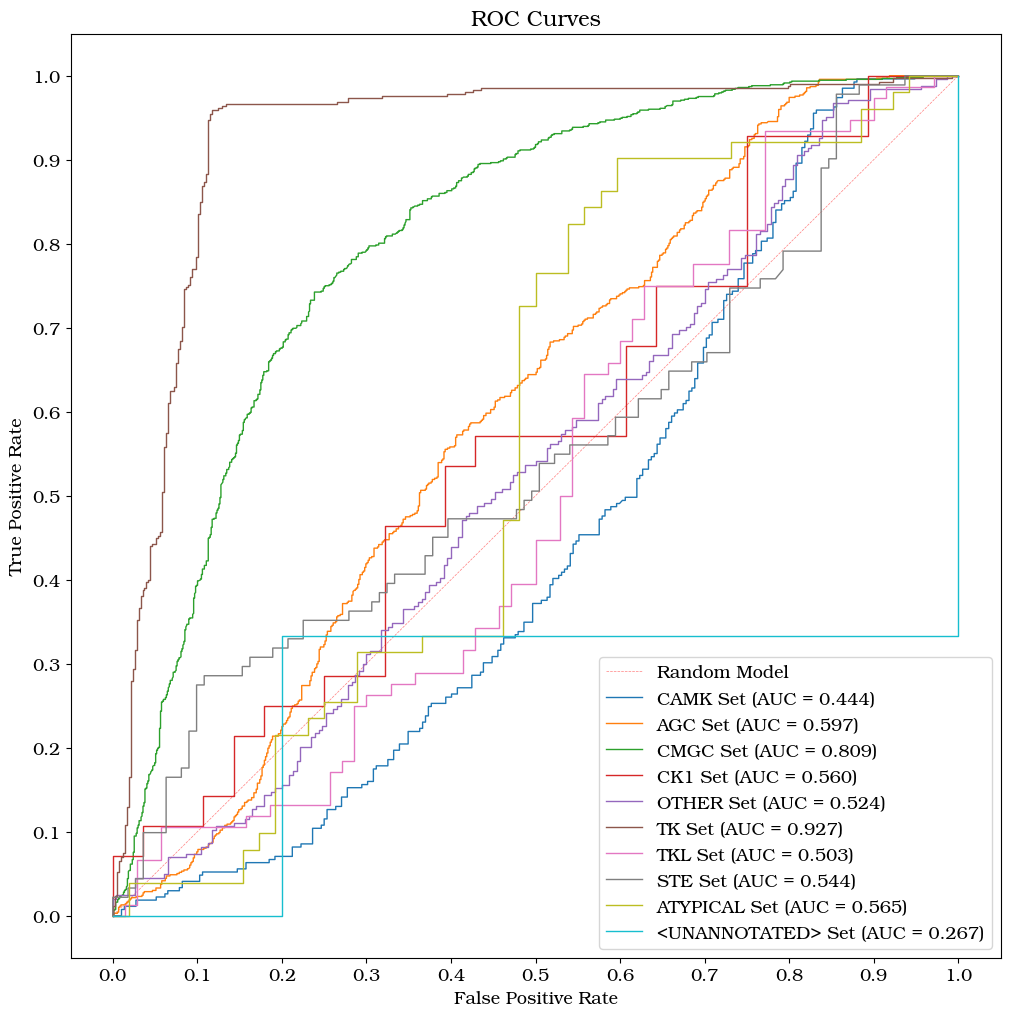

In [27]:
nn.get_all_rocs_by_group(test_loader, kinase_order, savefile = "../images/Evaluation and Results/ROC-by-group.png")